In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from wordcloud import WordCloud
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# 📥 Load cleaned reviews
df = pd.read_csv("../outputs/cleaned_reviews.csv")
print(f"Dataset: {df.shape[0]} reviews")
print(f"Avg length: {df['cleaned_review'].str.len().mean():.0f} chars")
print()

Dataset: 91 reviews
Avg length: 70 chars



In [33]:
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
stopwords.extend(['barang', 'produk', 'beli', 'toko', 'seller', 'admin'])

# TF-IDF settings for small dataset
tfidf = TfidfVectorizer(
    max_features=500,      # Reduced for small dataset
    min_df=2,             # Ignore rare words
    max_df=0.8,           # Ignore too common words
    stop_words=stopwords,
    ngram_range=(1, 2)    # Include bigrams
)
X = tfidf.fit_transform(df['cleaned_review'])
print(f"Vectorization: {X.shape}")


Vectorization: (91, 149)


In [34]:
# 🔍 FIND BEST K
print("Finding best number of clusters...")

# Test different k values
k_range = range(2, 8)
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"k={k}: {score:.3f}")

# Find best k
best_k = k_range[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
print(f"\n🏆 Best k: {best_k} (score: {best_score:.3f})")
print()


Finding best number of clusters...
k=2: 0.024
k=3: 0.023
k=4: 0.024
k=5: 0.024
k=6: 0.028
k=7: 0.037

🏆 Best k: 7 (score: 0.037)



In [ ]:
# 🎯 FINAL CLUSTERING
print("Final clustering with best k...")

# Run final clustering
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=20)
df['cluster'] = kmeans.fit_predict(X)

# Calculate final score
final_score = silhouette_score(X, df['cluster'])
print(f"Final Silhouette Score: {final_score:.3f}")
{AC748F0F-9071-453C-A3CE-DDE0C03A20DF}.pngprint()


Final clustering with best k...
Final Silhouette Score: 0.037



Simple visualization...


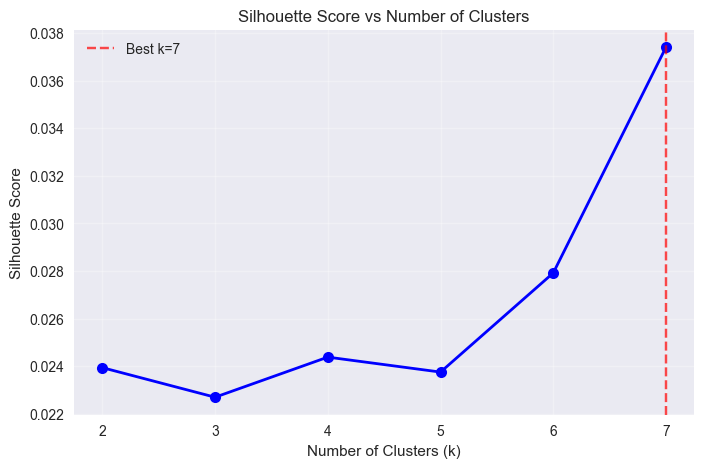

Cluster distribution:
   Cluster 0: 8 reviews
   Cluster 1: 23 reviews
   Cluster 2: 14 reviews
   Cluster 3: 5 reviews
   Cluster 4: 6 reviews
   Cluster 5: 19 reviews
   Cluster 6: 16 reviews



In [36]:
print("Simple visualization...")

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, 'bo-', linewidth=2, markersize=8)
plt.axvline(x=best_k, color='red', linestyle='--', alpha=0.7, label=f'Best k={best_k}')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Show cluster distribution
print(f"Cluster distribution:")
for cluster in sorted(df['cluster'].unique()):
    count = len(df[df['cluster'] == cluster])
    print(f"   Cluster {cluster}: {count} reviews")
print()


Word clouds for each cluster...


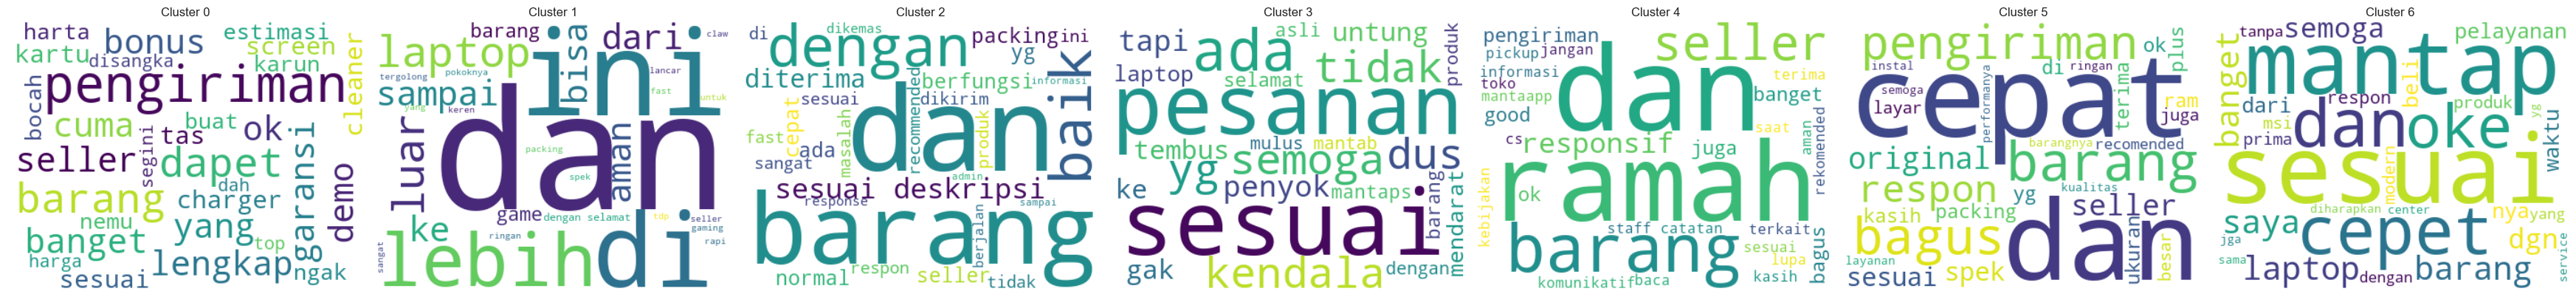

In [37]:
# ☁️ WORD CLOUDS
print("Word clouds for each cluster...")

# Create word clouds for each cluster
n_clusters = len(set(df['cluster']))
fig, axes = plt.subplots(1, n_clusters, figsize=(5*n_clusters, 4))
if n_clusters == 1:
    axes = [axes]

for i, cluster in enumerate(sorted(df['cluster'].unique())):
    cluster_text = " ".join(df[df['cluster'] == cluster]['cleaned_review'])
    
    wordcloud = WordCloud(
        width=400, height=300,
        background_color='white',
        max_words=30
    ).generate(cluster_text)
    
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()
print()


In [38]:
# 💾 SAVE RESULTS
print("Saving results...")

# Save the results
df[['review', 'cleaned_review', 'cluster']].to_csv("../outputs/clustered_reviews_improved.csv", index=False)

print("Done!")
print(f"New score: {final_score:.3f}")
print("Saved to: ../outputs/clustered_reviews_improved.csv")


Saving results...
Done!
New score: 0.037
Saved to: ../outputs/clustered_reviews_improved.csv
